In [13]:
!jt

In [68]:
#np.var= n으로 나눈다

In [101]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [103]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from lightgbm import LGBMRegressor

In [104]:
data=pd.read_csv("train_0909.csv")

In [105]:
data.describe()

,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,iem_nm_label,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,hist_d
count,1.603900e+04,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,1.603900e+04,16039.000000,1.603900e+04,16039.000000
mean,2.019091e+07,136.865765,1.332814,5.258183,24.598728,3.065403,2.045140,4.893135,4.645551,3.304009,10.030301,9.065154,7.196521,65.787518,921.168714,495.104184,3.263375e+06,1166.631336,3.183242e+04,73.671239
std,3.314602e+02,110.288212,0.471235,1.941112,39.625346,1.563360,0.502849,1.800099,2.095934,0.736675,3.374173,3.507860,21.407178,46.232712,765.073635,2888.715355,1.369705e+07,1636.912885,6.634967e+04,69.318482
min,2.019010e+07,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.570000e+02,0.000000,1.000000e+02,1.000000
25%,2.019063e+07,40.000000,1.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,9.000000,6.000000,2.000000,2.000000,217.500000,8.000000,1.200000e+05,500.000000,4.135000e+03,14.000000
50%,2.019103e+07,115.000000,1.000000,5.000000,4.000000,3.000000,2.000000,5.000000,4.000000,3.000000,10.000000,10.000000,2.000000,99.000000,683.000000,50.000000,6.113200e+05,500.000000,9.520000e+03,45.000000
75%,2.019121e+07,217.000000,2.000000,7.000000,5.000000,4.000000,2.000000,6.000000,5.000000,4.000000,13.000000,12.000000,3.000000,99.000000,1539.500000,230.000000,2.185230e+06,500.000000,3.020000e+04,128.000000
max,2.019123e+07,493.000000,2.000000,9.000000,99.000000,6.000000,15.000000,9.000000,9.000000,6.000000,16.000000,14.000000,99.000000,99.000000,3044.000000,233281.000000,6.951774e+08,5000.000000,1.430000e+06,246.000000


In [106]:
# hold_d >hist_d인 경우로 판단을 해보자

In [110]:
data['after']=data['hold_d']-data['hist_d']

In [119]:
data=data[data['after']>0]
data

,act_id,iem_cd,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,...,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,iem_nm_label,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,hist_d,after
0,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20190424,174,1,4,5,5,2,3,...,7,3,99,1099,1670.0,9769500.0,5000.0,5850.0,170,4
1,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A043200,20190924,71,1,4,5,5,2,3,...,13,3,99,2098,7999.0,19517560.0,500.0,2440.0,67,4
2,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A042510,20190524,241,1,6,4,4,2,5,...,13,3,99,1931,1100.0,3789500.0,500.0,3445.0,150,91
3,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A001045,20190617,164,1,6,4,4,2,5,...,2,99,99,2311,23.0,1271900.0,5000.0,55300.0,135,29
4,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,A166090,20191030,85,1,6,4,4,2,5,...,13,2,2,349,200.0,3400000.0,500.0,17000.0,43,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16033,b49870eda1fe80d5d0eb4c08c1e23b1e5055d466b4af33...,A067630,20191030,72,2,2,99,6,2,2,...,5,1,2,107,852.0,29394000.0,500.0,34500.0,43,29
16034,b49870eda1fe80d5d0eb4c08c1e23b1e5055d466b4af33...,A028300,20191028,123,2,2,99,6,2,2,...,10,1,2,151,264.0,34584000.0,500.0,131000.0,45,78
16035,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A100700,20191120,38,1,6,0,5,2,5,...,10,2,99,556,20.0,65600.0,100.0,3280.0,28,10
16036,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A026960,20190701,262,1,6,0,5,2,5,...,7,1,1,59,2.0,38100.0,500.0,19050.0,125,137


In [112]:

data_hist_sort=data.sort_values(by=['hist_d'],axis=0)

In [113]:
data_hist_sort

,act_id,iem_cd,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,...,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,iem_nm_label,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,hist_d,after
14727,66f7273dd37f55bea2170f1b87baf73d61465512a82e5d...,A321550,20191230,2,2,5,99,2,2,5,...,5,2,99,413,16.0,282400.0,500.0,17650.0,1,1
14149,1bb90f04120e631132f5c8cfc666acc9523751fed4041d...,A006050,20191230,3,1,6,2,5,2,7,...,10,3,99,1256,1.0,1960.0,500.0,1960.0,1,2
14146,1bb90f04120e631132f5c8cfc666acc9523751fed4041d...,A010600,20191230,2,1,6,2,5,2,7,...,7,3,99,1108,1.0,2185.0,500.0,2185.0,1,1
14144,1bb90f04120e631132f5c8cfc666acc9523751fed4041d...,A011200,20191230,3,1,6,2,5,2,7,...,6,1,1,49,1.0,3550.0,5000.0,3550.0,1,2
9227,7b84dae0e17a1f0d8b5c409cf1989866b2d739289270c2...,A266420,20191230,28,1,3,4,1,2,3,...,14,99,99,2653,10.0,126850.0,0.0,12685.0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,1418348ebc581f289c59b796844c873afa1741e9c823e7...,A298690,20190102,328,2,4,99,1,2,4,...,6,3,99,1059,27.0,163620.0,1000.0,6060.0,246,82
9593,413c8ff7964c0c08b8f45c3e4e81a988f331458faad878...,A000880,20190102,311,1,5,3,2,3,5,...,12,2,1,282,6.0,186000.0,5000.0,31000.0,246,65
747,3468a31ae0a6aa0e67f563041d52072bc139aa80186f06...,A036670,20190102,333,1,6,5,6,2,5,...,10,3,99,1287,382.0,2971960.0,500.0,7780.0,246,87
6997,5c7d4541a78f9e10ccd377614ca9c90032aa60a145cc3b...,A298380,20190102,424,2,5,99,3,2,6,...,10,1,2,131,20.0,449000.0,500.0,22450.0,246,178


In [114]:
data_hist_mean=pd.DataFrame(data_hist_sort.groupby(['hist_d'])['after'].mean())
data_hist_sd=pd.DataFrame(data_hist_sort.groupby(['hist_d'])['after'].std())
data_hist_var=pd.DataFrame(data_hist_sort.groupby(['hist_d'])['after'].var())
data_hist_mid=pd.DataFrame(data_hist_sort.groupby(['hist_d'])['after'].median())



In [115]:
data_hist_mean

,after
hist_d,
1,26.845842
2,33.237430
3,31.790036
4,34.521569
5,36.876289
...,...
242,68.333333
243,133.875000
244,101.111111


In [116]:
a=pd.DataFrame(data.hist_d.value_counts())
a['hist']=a.index
a['count']=a['hist_d']
a=a.sort_values(by=['hist'],axis=0)
a=a.drop(['hist_d'],axis=1)

In [130]:
a['after_mean']=data_hist_mean
a['after_std']=data_hist_sd
a['after_var']=data_hist_var
a['after_median']=data_hist_mid
a['mean-mid']=data_hist_mean-data_hist_mid
a['hold_mean']=a['after_mean']+a['hist']

In [131]:
a[:60]

,hist,count,after_mean,after_std,after_var,after_median,mean-mid,hold_d_mean,hold_mean
1,1,493,26.845842,46.314853,2145.065618,7.0,19.845842,27.845842,27.845842
2,2,358,33.237430,51.991079,2703.072321,9.5,23.737430,35.237430,35.237430
3,3,281,31.790036,51.585872,2661.102186,8.0,23.790036,34.790036,34.790036
4,4,255,34.521569,49.806224,2480.659966,13.0,21.521569,38.521569,38.521569
5,5,291,36.876289,51.128761,2614.150160,13.0,23.876289,41.876289,41.876289
6,6,268,40.746269,54.870114,3010.729387,11.0,29.746269,46.746269,46.746269
7,7,268,30.384328,46.255819,2139.600802,12.0,18.384328,37.384328,37.384328
8,8,271,35.885609,52.001476,2704.153533,11.0,24.885609,43.885609,43.885609
9,9,251,36.494024,49.810551,2481.090964,16.0,20.494024,45.494024,45.494024
10,10,220,44.504545,52.631093,2770.031943,21.0,23.504545,54.504545,54.504545


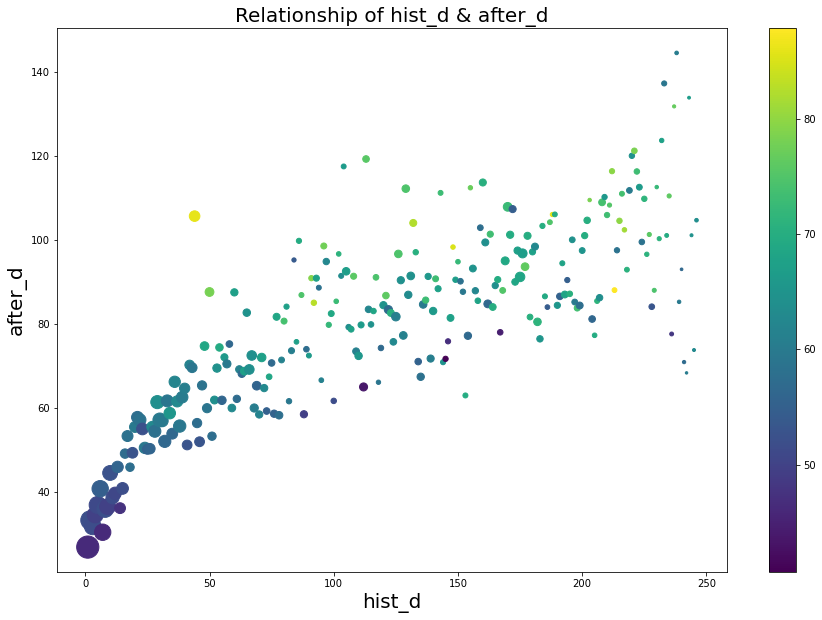

In [149]:
#
plt.figure(figsize=(15,10))
plt.title("Relationship of hist_d & after_d",fontsize=20)
plt.scatter(a['hist'],a['after_mean'],s=a['count'],c=a['after_std'])
plt.xlabel("hist_d",fontsize=20)
plt.ylabel("after_d",fontsize=20)
plt.colorbar()
plt.show()

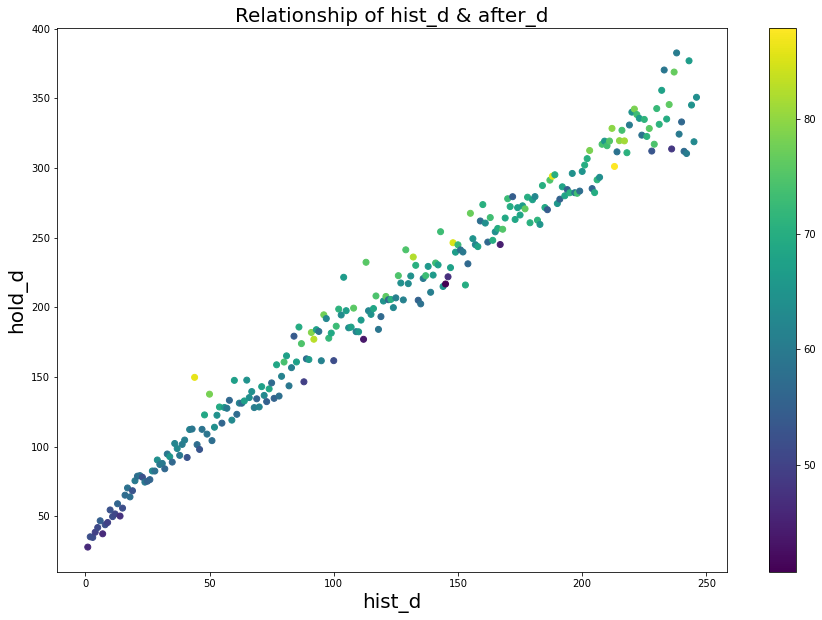

In [147]:
#
plt.figure(figsize=(15,10))
plt.title("Relationship of hist_d & after_d",fontsize=20)
plt.scatter(a['hist'],a['hold_mean'],c=a['after_std'])
plt.xlabel("hist_d",fontsize=20)
plt.ylabel("hold_d",fontsize=20)
plt.colorbar()
plt.show()

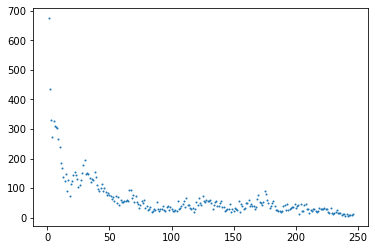

In [61]:
plt.scatter(a['hist'],a['count'],s=1)

# hist_d에 따른 평균으로 RMSE를 계산해보자

In [139]:
a

,hist,count,after_mean,after_std,after_var,after_median,mean-mid,hold_d_mean,hold_mean,RMSE
1,1,493,26.845842,46.314853,2145.065618,7.0,19.845842,27.845842,27.845842,1.057517e+06
2,2,358,33.237430,51.991079,2703.072321,9.5,23.737430,35.237430,35.237430,9.676999e+05
3,3,281,31.790036,51.585872,2661.102186,8.0,23.790036,34.790036,34.790036,7.477697e+05
4,4,255,34.521569,49.806224,2480.659966,13.0,21.521569,38.521569,38.521569,6.325683e+05
5,5,291,36.876289,51.128761,2614.150160,13.0,23.876289,41.876289,41.876289,7.607177e+05
...,...,...,...,...,...,...,...,...,...,...
242,242,6,68.333333,60.258333,3631.066667,55.5,12.833333,310.333333,310.333333,2.178640e+04
243,243,8,133.875000,66.672842,4445.267857,142.0,-8.125000,376.875000,376.875000,3.556214e+04
244,244,9,101.111111,64.698231,4185.861111,79.0,22.111111,345.111111,345.111111,3.767275e+04
245,245,9,73.777778,62.874434,3953.194444,60.0,13.777778,318.777778,318.777778,3.557875e+04


In [140]:
a['RMSE']=a['after_var']*a['count']

In [141]:
(a['RMSE'].sum()/a['count'].sum())**0.5

60.912822624382855

In [50]:
a=pd.DataFrame(data.hold_d.value_counts())
a['c']=a.index
a=a.sort_values(by=['c'],axis=0)

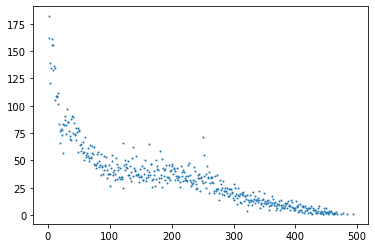

In [43]:
plt.scatter(a['c'],a['hold_d'],s=1)

In [66]:
d=[1,3,5]
np.var(d)

2.6666666666666665

In [67]:
8/3

2.6666666666666665

In [27]:
data.describe()

,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,iem_nm_label,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,hist_d
count,1.603900e+04,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,16039.000000,1.603900e+04,16039.000000,1.603900e+04,16039.000000
mean,2.019091e+07,136.865765,1.332814,5.258183,24.598728,3.065403,2.045140,4.893135,4.645551,3.304009,10.030301,9.065154,7.196521,65.787518,921.168714,495.104184,3.263375e+06,1166.631336,3.183242e+04,73.671239
std,3.314602e+02,110.288212,0.471235,1.941112,39.625346,1.563360,0.502849,1.800099,2.095934,0.736675,3.374173,3.507860,21.407178,46.232712,765.073635,2888.715355,1.369705e+07,1636.912885,6.634967e+04,69.318482
min,2.019010e+07,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.570000e+02,0.000000,1.000000e+02,1.000000
25%,2.019063e+07,40.000000,1.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,9.000000,6.000000,2.000000,2.000000,217.500000,8.000000,1.200000e+05,500.000000,4.135000e+03,14.000000
50%,2.019103e+07,115.000000,1.000000,5.000000,4.000000,3.000000,2.000000,5.000000,4.000000,3.000000,10.000000,10.000000,2.000000,99.000000,683.000000,50.000000,6.113200e+05,500.000000,9.520000e+03,45.000000
75%,2.019121e+07,217.000000,2.000000,7.000000,5.000000,4.000000,2.000000,6.000000,5.000000,4.000000,13.000000,12.000000,3.000000,99.000000,1539.500000,230.000000,2.185230e+06,500.000000,3.020000e+04,128.000000
max,2.019123e+07,493.000000,2.000000,9.000000,99.000000,6.000000,15.000000,9.000000,9.000000,6.000000,16.000000,14.000000,99.000000,99.000000,3044.000000,233281.000000,6.951774e+08,5000.000000,1.430000e+06,246.000000


In [21]:
'''
cus = pd.read_csv("cus_info.csv")
iem = pd.read_csv("iem_info.csv")
hist = pd.read_csv("stk_bnc_hist.csv")
'''

In [12]:
hist = pd.read_csv("stk_bnc_hist.csv")
hist['stk_p']=hist['tot_aet_amt']/hist['bnc_qty'] # 잔고 하나당 금액
hist=hist.fillna(0)

In [13]:
data = pd.merge(data,hist,how = "left", on=["act_id","iem_cd"])
data = data[(data['byn_dt']==data['bse_dt'])]
data.reset_index(drop=True, inplace=True)

data = data.drop(["act_id", "iem_cd", "byn_dt", "bse_dt"], axis = 1)


L_encoder=LabelEncoder()
L_encoder.fit(iem['iem_krl_nm'])
data['iem_krl_nm']=L_encoder.transform(data['iem_krl_nm'])


In [29]:
data['sex_dit_cd']=data['sex_dit_cd']-1

In [15]:
dd=data.drop(['month','date','year','test'],axis=1)

In [18]:
dd.to_csv('new_train_2019.csv')

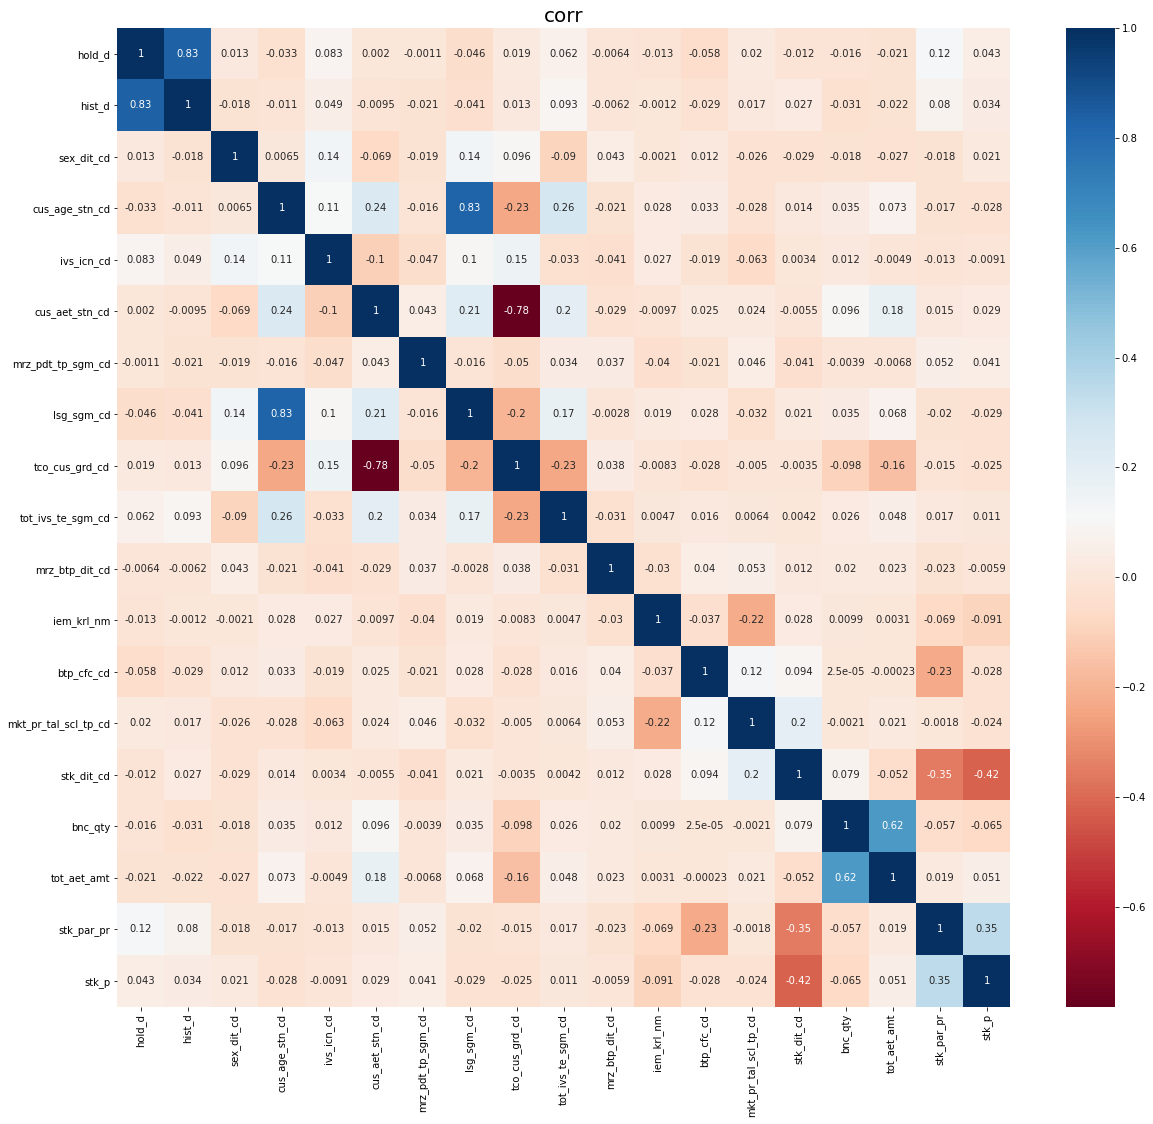

In [17]:
sns.heatmap(data=dd.corr(),annot=True,cmap='RdBu')
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.title('corr',fontsize=20)
plt.show()

In [19]:
dd

,hold_d,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,174,170,0,4,5,5,2,3,4,5,16,883,7,3,99,1670.0,9769500.0,5000.0,5850.0
1,71,67,0,4,5,5,2,3,4,5,16,2663,13,3,99,7999.0,19517560.0,500.0,2440.0
2,241,150,0,6,4,4,2,5,2,6,1,1082,13,3,99,1100.0,3789500.0,500.0,3445.0
3,164,135,0,6,4,4,2,5,2,6,1,60,2,99,99,23.0,1271900.0,5000.0,55300.0
4,85,43,0,6,4,4,2,5,2,6,1,2787,13,2,2,200.0,3400000.0,500.0,17000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,123,45,1,2,99,6,2,2,2,3,16,1851,10,1,2,264.0,34584000.0,500.0,131000.0
16035,38,28,0,6,0,5,2,5,3,5,2,1501,10,2,99,20.0,65600.0,100.0,3280.0
16036,262,125,0,6,0,5,2,5,3,5,2,984,7,1,1,2.0,38100.0,500.0,19050.0
16037,35,34,0,6,0,5,2,5,3,5,2,1330,14,2,99,1.0,56700.0,5000.0,56700.0


In [20]:
dd.columns

Index(['hold_d', 'hist_d', 'sex_dit_cd', 'cus_age_stn_cd', 'ivs_icn_cd',
       'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd', 'lsg_sgm_cd', 'tco_cus_grd_cd',
       'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd', 'iem_krl_nm', 'btp_cfc_cd',
       'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd', 'bnc_qty', 'tot_aet_amt',
       'stk_par_pr', 'stk_p'],
      dtype='object')

In [21]:
Y=dd.hold_d
X=dd.drop(['hold_d'],axis=1)

In [22]:
X

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,170,0,4,5,5,2,3,4,5,16,883,7,3,99,1670.0,9769500.0,5000.0,5850.0
1,67,0,4,5,5,2,3,4,5,16,2663,13,3,99,7999.0,19517560.0,500.0,2440.0
2,150,0,6,4,4,2,5,2,6,1,1082,13,3,99,1100.0,3789500.0,500.0,3445.0
3,135,0,6,4,4,2,5,2,6,1,60,2,99,99,23.0,1271900.0,5000.0,55300.0
4,43,0,6,4,4,2,5,2,6,1,2787,13,2,2,200.0,3400000.0,500.0,17000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,45,1,2,99,6,2,2,2,3,16,1851,10,1,2,264.0,34584000.0,500.0,131000.0
16035,28,0,6,0,5,2,5,3,5,2,1501,10,2,99,20.0,65600.0,100.0,3280.0
16036,125,0,6,0,5,2,5,3,5,2,984,7,1,1,2.0,38100.0,500.0,19050.0
16037,34,0,6,0,5,2,5,3,5,2,1330,14,2,99,1.0,56700.0,5000.0,56700.0


In [23]:
# 데이터 분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, train_test_split
#모델
from lightgbm import LGBMRegressor

y=Y
X=X

train_x,val_x,train_y,val_y=train_test_split(X,y,test_size=0.25,random_state=1)

model = LGBMRegressor(objective= "regression",
                          max_depth= 20,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)

model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=100,
              verbose=500)

Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 58.6355	valid_0's l2: 3438.12
[1000]	valid_0's rmse: 58.2123	valid_0's l2: 3388.67
[1500]	valid_0's rmse: 58.0874	valid_0's l2: 3374.15
Early stopping, best iteration is:
[1699]	valid_0's rmse: 58.0232	valid_0's l2: 3366.69


LGBMRegressor(learning_rate=0.01, max_depth=20, n_estimators=2000,
              objective='regression')

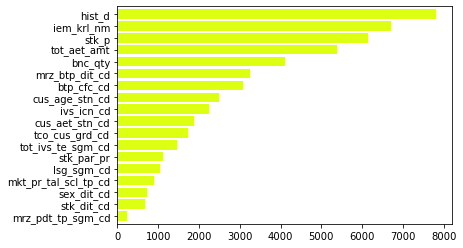

In [24]:
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11')
#fig=plt.gcf()
#fig.set_size_inches(30,28)
plt.show()

## 2020년에 구매한 test만 추출하여 모델로 예측한다.(같은 의미의 데이터이므로)

In [ ]:
test=pd.read_csv("stk_hld_test.csv")

test_data = pd.merge(test,cus,how="left",on=['act_id'])
test_data = pd.merge(test_data,iem,how="left",on=["iem_cd"])

test_data = pd.merge(test_data, hist, how = "left", on = ["act_id", "iem_cd"])
test_data = test_data[(test_data["byn_dt"] == test_data["bse_dt"])]
test_data.reset_index(drop = True, inplace = True)

test_data_2020=test_data[test_data['byn_dt']>20200000]
test_data_201x=test_data[test_data['byn_dt']<20200000]

test_data_2020_sub=test_data_2020[['submit_id','hold_d']]

test_data_2020 = test_data_2020.drop(["act_id", "iem_cd", "byn_dt", "submit_id", "hold_d", "bse_dt"], axis = 1)
test_data_2020['iem_krl_nm']=L_encoder.transform(test_data_2020['iem_krl_nm'])



In [104]:
test_data_2020_sub

,submit_id,hold_d
0,IDX00001,0
2,IDX00003,0
3,IDX00004,0
4,IDX00005,0
5,IDX00006,0
...,...,...
70590,IDX70591,0
70591,IDX70592,0
70592,IDX70593,0
70594,IDX70595,0


In [105]:
test_data_2020

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,153,1,9,3,2,2,9,5,5,8,418,4,1,1,300.0,3945000.0,5000.0,13150.0
2,139,1,9,3,2,2,9,5,5,8,1515,13,2,99,138.0,4291800.0,500.0,31100.0
3,236,1,9,3,2,2,9,5,5,8,2681,13,3,99,2972.0,6716720.0,500.0,2260.0
4,9,1,9,3,2,2,9,5,5,8,2450,13,1,2,10.0,464500.0,100.0,46450.0
5,93,1,6,0,3,2,5,5,6,9,2457,13,3,99,60.0,186900.0,500.0,3115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70590,62,1,6,0,5,2,5,3,5,2,1330,14,2,99,9.0,531000.0,5000.0,59000.0
70591,23,1,6,0,5,2,5,3,5,2,1369,2,1,1,1.0,198500.0,500.0,198500.0
70592,103,1,6,0,5,2,5,3,5,2,444,2,99,99,50.0,372000.0,5000.0,7440.0
70594,11,1,4,4,2,2,3,4,3,8,2373,8,2,99,96.0,11424000.0,2500.0,119000.0


In [106]:
predict=model.predict(test_data_2020)
predict

array([220.91672404, 217.4244108 , 342.2054103 , ..., 212.47197956,
        39.96110859,  27.49246569])

In [107]:
test_data_2020['pred']=predict
test_data_2020
test_data_2020['min_d']=test_data_2020['hist_d']+1
test_data_2020['max_d']=test_data_2020['hist_d']+146

maxvs=test_data_2020[['pred','max_d']]
maxvs['pred_max']=maxvs.min(axis=1)

minvs=pd.DataFrame(test_data_2020['min_d'])
minvs['pred_max']=maxvs['pred_max']
test_data_2020['pred_final']=minvs.max(axis=1)

test_data_2020

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,...,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,pred,min_d,max_d,pred_final
0,153,1,9,3,2,2,9,5,5,8,...,1,1,300.0,3945000.0,5000.0,13150.0,220.916724,154,299,220.916724
2,139,1,9,3,2,2,9,5,5,8,...,2,99,138.0,4291800.0,500.0,31100.0,217.424411,140,285,217.424411
3,236,1,9,3,2,2,9,5,5,8,...,3,99,2972.0,6716720.0,500.0,2260.0,342.205410,237,382,342.205410
4,9,1,9,3,2,2,9,5,5,8,...,1,2,10.0,464500.0,100.0,46450.0,53.884146,10,155,53.884146
5,93,1,6,0,3,2,5,5,6,9,...,3,99,60.0,186900.0,500.0,3115.0,203.289953,94,239,203.289953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70590,62,1,6,0,5,2,5,3,5,2,...,2,99,9.0,531000.0,5000.0,59000.0,145.935457,63,208,145.935457
70591,23,1,6,0,5,2,5,3,5,2,...,1,1,1.0,198500.0,500.0,198500.0,135.216682,24,169,135.216682
70592,103,1,6,0,5,2,5,3,5,2,...,99,99,50.0,372000.0,5000.0,7440.0,212.471980,104,249,212.471980
70594,11,1,4,4,2,2,3,4,3,8,...,2,99,96.0,11424000.0,2500.0,119000.0,39.961109,12,157,39.961109


In [108]:
test_data_2020_sub['hold_d']=test_data_2020['pred_final']
test_data_2020_sub

,submit_id,hold_d
0,IDX00001,220.916724
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
5,IDX00006,203.289953
...,...,...
70590,IDX70591,145.935457
70591,IDX70592,135.216682
70592,IDX70593,212.471980
70594,IDX70595,39.961109


In [109]:
test_data_2020_sub

,submit_id,hold_d
0,IDX00001,220.916724
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
5,IDX00006,203.289953
...,...,...
70590,IDX70591,145.935457
70591,IDX70592,135.216682
70592,IDX70593,212.471980
70594,IDX70595,39.961109


In [110]:
sub_org=pd.read_csv("sub_basee.csv")
sub_org

,submit_id,hold_d
0,IDX00001,255.0
1,IDX00002,481.0
2,IDX00003,232.0
3,IDX00004,382.0
4,IDX00005,15.0
...,...,...
70591,IDX70592,39.0
70592,IDX70593,172.0
70593,IDX70594,863.0
70594,IDX70595,19.0


In [114]:
sub=pd.merge(sub_org,test_data_2020_sub,how="left",on=['submit_id'])
sub_0=sub.fillna(0)
sub_0

,submit_id,hold_d_x,hold_d_y
0,IDX00001,255.0,220.916724
1,IDX00002,481.0,0.000000
2,IDX00003,232.0,217.424411
3,IDX00004,382.0,342.205410
4,IDX00005,15.0,53.884146
...,...,...,...
70591,IDX70592,39.0,135.216682
70592,IDX70593,172.0,212.471980
70593,IDX70594,863.0,0.000000
70594,IDX70595,19.0,39.961109


In [118]:
sub_2020=sub_0[sub_0['hold_d_y']>0]
sub_201x=sub_0[sub_0['hold_d_y']==0]

sub_2020['pred']=sub_2020['hold_d_y']
sub_201x['pred']=sub_201x['hold_d_x']

In [119]:
sub_2020

,submit_id,hold_d_x,hold_d_y,pred
0,IDX00001,255.0,220.916724,220.916724
2,IDX00003,232.0,217.424411,217.424411
3,IDX00004,382.0,342.205410,342.205410
4,IDX00005,15.0,53.884146,53.884146
5,IDX00006,155.0,203.289953,203.289953
...,...,...,...,...
70590,IDX70591,104.0,145.935457,145.935457
70591,IDX70592,39.0,135.216682,135.216682
70592,IDX70593,172.0,212.471980,212.471980
70594,IDX70595,19.0,39.961109,39.961109


In [120]:
sub_201x

,submit_id,hold_d_x,hold_d_y,pred
1,IDX00002,481.0,0.0,481.0
7,IDX00008,866.0,0.0,866.0
9,IDX00010,656.0,0.0,656.0
11,IDX00012,1228.0,0.0,1228.0
12,IDX00013,613.0,0.0,613.0
...,...,...,...,...
64827,IDX64828,511.0,0.0,511.0
70580,IDX70581,1228.0,0.0,1228.0
70587,IDX70588,433.0,0.0,433.0
70588,IDX70589,503.0,0.0,503.0


In [123]:
sub_final=pd.concat([sub_2020,sub_201x])
sub_final=sub_final[['submit_id','pred']]
sub_final

,submit_id,pred
0,IDX00001,220.916724
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
5,IDX00006,203.289953
...,...,...
64827,IDX64828,511.000000
70580,IDX70581,1228.000000
70587,IDX70588,433.000000
70588,IDX70589,503.000000


In [124]:
ss=pd.merge(sub_0,sub_final,how="left",on=['submit_id'])
ss

,submit_id,hold_d_x,hold_d_y,pred
0,IDX00001,255.0,220.916724,220.916724
1,IDX00002,481.0,0.000000,481.000000
2,IDX00003,232.0,217.424411,217.424411
3,IDX00004,382.0,342.205410,342.205410
4,IDX00005,15.0,53.884146,53.884146
...,...,...,...,...
70591,IDX70592,39.0,135.216682,135.216682
70592,IDX70593,172.0,212.471980,212.471980
70593,IDX70594,863.0,0.000000,863.000000
70594,IDX70595,19.0,39.961109,39.961109


In [125]:
ss.rename(columns={"pred":"hold_d"},inplace=True)
ss

,submit_id,hold_d_x,hold_d_y,hold_d
0,IDX00001,255.0,220.916724,220.916724
1,IDX00002,481.0,0.000000,481.000000
2,IDX00003,232.0,217.424411,217.424411
3,IDX00004,382.0,342.205410,342.205410
4,IDX00005,15.0,53.884146,53.884146
...,...,...,...,...
70591,IDX70592,39.0,135.216682,135.216682
70592,IDX70593,172.0,212.471980,212.471980
70593,IDX70594,863.0,0.000000,863.000000
70594,IDX70595,19.0,39.961109,39.961109


In [126]:
sub_0905_02=ss[['submit_id','hold_d']]
sub_0905_02

,submit_id,hold_d
0,IDX00001,220.916724
1,IDX00002,481.000000
2,IDX00003,217.424411
3,IDX00004,342.205410
4,IDX00005,53.884146
...,...,...
70591,IDX70592,135.216682
70592,IDX70593,212.471980
70593,IDX70594,863.000000
70594,IDX70595,39.961109


In [128]:
sub_0905_02.to_csv('sub_0905_only2020_newtrain.csv',index=False)

## 기존의 전체 train을 고려한 model로 예측한 sub에서 2020년에 구매한 test의 예측 값만 바꿔준다